In [1]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import gym

env = gym.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode="human")


/home/edu/anaconda3/envs/tp_ap/lib/python3.9/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/home/edu/anaconda3/envs/tp_ap/lib/python3.9/site-packages/gym/envs/registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


In [2]:
env.action_space

Discrete(256)

In [3]:
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env.action_space

Discrete(7)

In [4]:
# size of a game frame
env.observation_space.shape

(240, 256, 3)

In [5]:
def run():
    done = True
    env.reset()
    for step in range(5000):
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        if done:
            env.reset()
    
    env.close()
    

In [6]:
state = env.reset()
#env.step(1)[4]


In [7]:
from gym.spaces import Box
from gym.wrappers import FrameStack, GrayScaleObservation, ResizeObservation

class SkipFrame(gym.Wrapper):
    def __init__(self, env, skip):
        """Return only every `skip`-th frame"""
        super().__init__(env)
        self._skip = skip

    def step(self, action):
        """Repeat action, and sum reward"""
        total_reward = 0.0
        for i in range(self._skip):
            # Accumulate reward and repeat the same action
            obs, reward, done, trunk, info = self.env.step(action)
            total_reward += reward
            if done:
                break
        return obs, total_reward, done, trunk, info

# Apply Wrappers to environment
env = SkipFrame(env, skip=4)

(240, 256, 3)


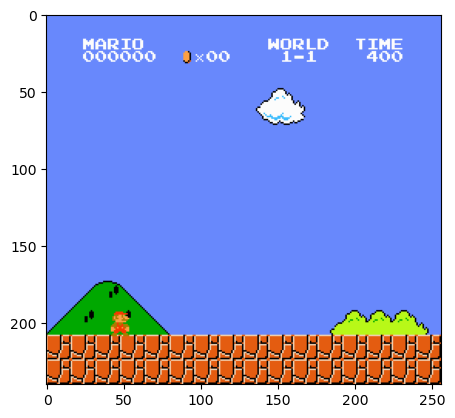

In [8]:
from matplotlib import pyplot as plt
state = env.reset()[0]
print(state.shape)
plt.imshow(state)

(240, 256)


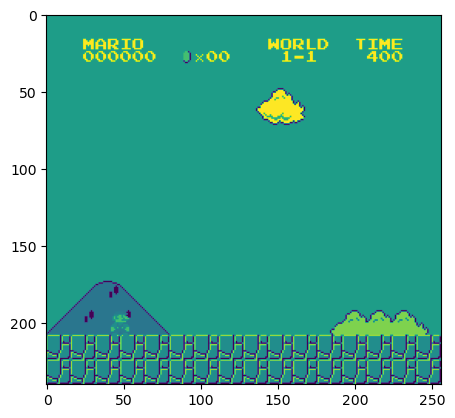

In [9]:
env = GrayScaleObservation(env)
state = env.reset()[0]
print(state.shape)
plt.imshow(state)

(84, 84, 1)


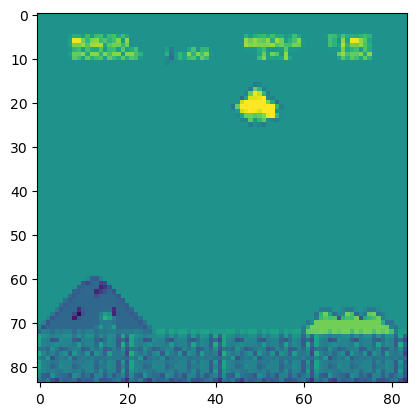

In [10]:
env = ResizeObservation(env, shape=84)
state = env.reset()[0]
print(state.shape)
plt.imshow(state)

(4, 84, 84, 1)


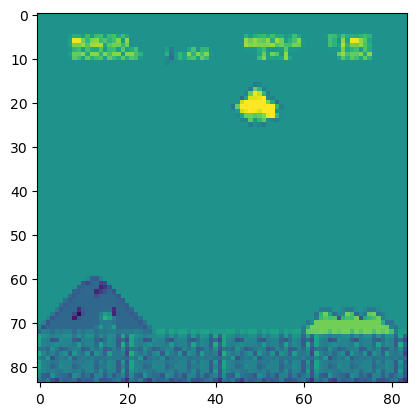

In [11]:
env = FrameStack(env, num_stack=4)
state = env.reset()[0]
print(state.shape)
plt.imshow(state[3])

In [ ]:
action = env.action_space.sample()
#print(action)
state, reward, terminated, truncated, info = env.step(action)
#print(state[0])


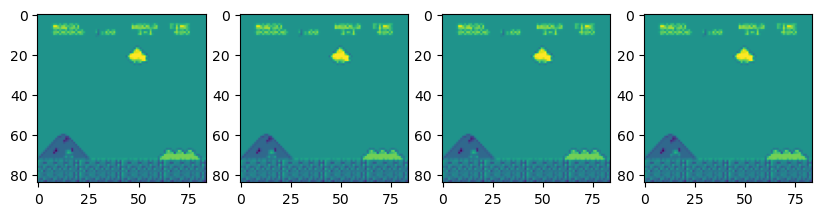

In [13]:
plt.figure(figsize=(10,8))
for idx in range(state.shape[0]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[idx][:])
plt.show()

In [14]:
env.close()